In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Activation Function: sigmoid, Accuracy: 0.70


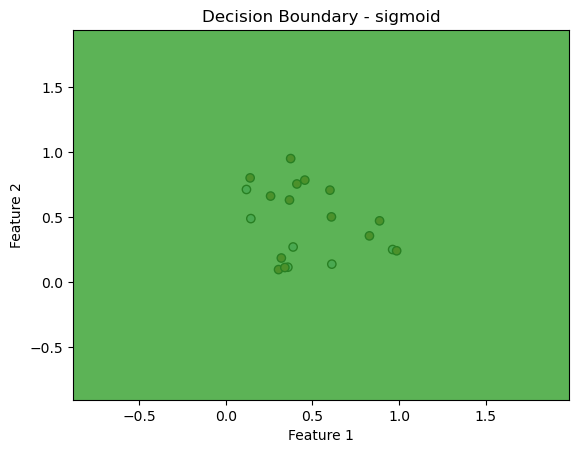

Activation Function: tanh, Accuracy: 0.40


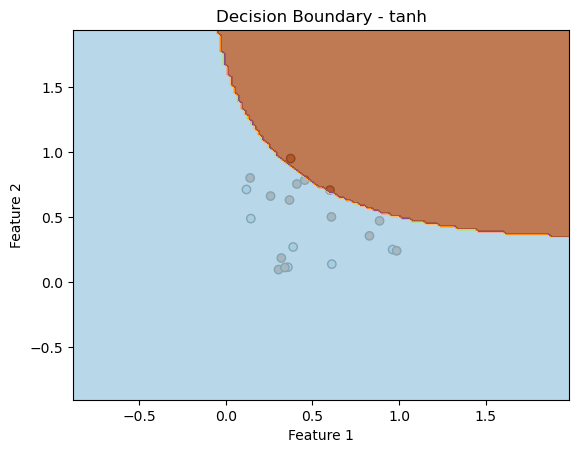

Activation Function: relu, Accuracy: 0.45


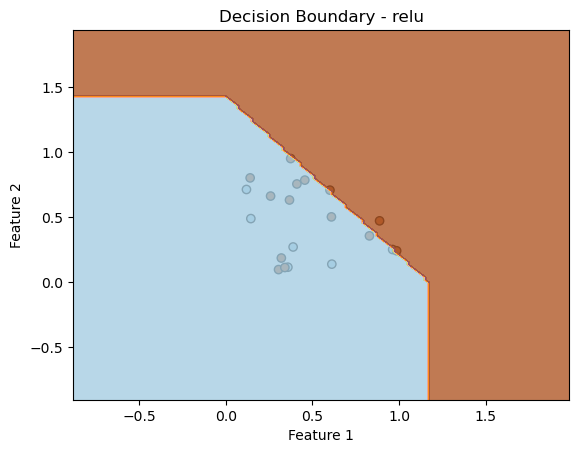

Activation Function: leaky_relu, Accuracy: 0.45


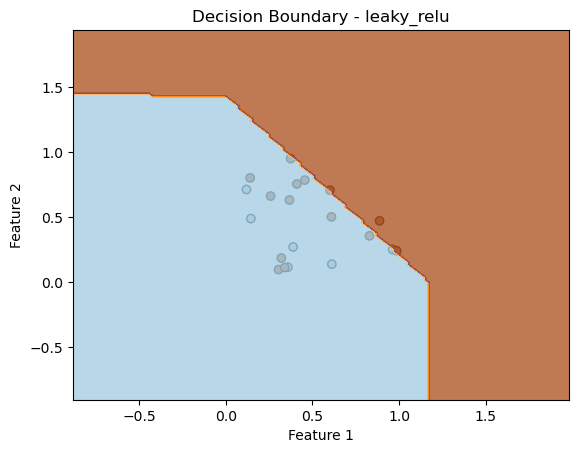

In [28]:
np.random.seed(42)
X, y = np.random.rand(100, 2), np.random.choice([0, 1], size=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

activation_functions = [sigmoid, tanh, relu, leaky_relu]

for activation_func in activation_functions:
    
    X_train_activation = activation_func(X_train)
    X_test_activation = activation_func(X_test)

    perceptron = Perceptron(random_state=42)
    perceptron.fit(X_train_activation, y_train)

    y_pred = perceptron.predict(X_test_activation)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Activation Function: {activation_func.__name__}, Accuracy: {accuracy:.2f}")

    if X_train.shape[1] == 2:
        plt.figure()
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolor='k')
        plt.title(f'Decision Boundary - {activation_func.__name__}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

        h = .02
        x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
        y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = perceptron.predict(activation_func(np.c_[xx.ravel(), yy.ravel()]))

        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
        plt.show()